**Import libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Membaca data**

In [2]:
df = pd.read_csv('Hasil TES SBK LPDP Gelombang 1 - 2021.csv')
df

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
...,...,...,...,...,...,...,...,...,...,...
426,Reguler,S2,Dalam negeri,718,Tidak,Tidak,23,25,12,UGM
427,Reguler,S2,Dalam negeri,TRP,Tidak,Tidak,14,14,6,UI
428,Targeted,S2,Luar Negeri,ENT,Tidak,Tidak,15,7,9,Imperial College London
429,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,17,11,6,NaN


<h3>Data Cleaning</h3>

**Memeriksa tipe data**<br>
Hal ini dilakukan dengan tujuan untuk memastikan setiap kolom sudah memiliki tipe data yang sesuai, baik itu integer, float, maupun object.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 10 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Jenis Beasiswa                                                                        431 non-null    object
 1   Tingkat Pendidikan yang Dituju                                                        431 non-null    object
 2   Negara Tujuan Kuliah                                                                  431 non-null    object
 3   Bidang Studi yang dipilih saat mendaftar                                              431 non-null    object
 4   Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                431 non-null    object
 5   Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?  431 no

**Mengidentifikasi kolom yang memiliki single value**

In [4]:
df.nunique()

Jenis Beasiswa                                                                            3
Tingkat Pendidikan yang Dituju                                                            2
Negara Tujuan Kuliah                                                                      2
Bidang Studi yang dipilih saat mendaftar                                                 85
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                    2
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?      2
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           19
Jumlah Jawaban Benar pada Tes Kuantitatif                                                23
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          12
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                               165
dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa tidak ditemukan adanya kolom yang memiliki single value yang menyebabkan variansi dari suatu kolom menjadi 0. Oleh karena itu, tidak akan dilakukan perubahan apapun terkait proses identifikasi ini.

Selanjutnya yaitu proses identifikasi kolom yang memiliki few values atau low variance.

Sebagian besar dari dataset ini, tipe kolomnya yaitu berupa kategorikal (label) dan bukanlah numerik sehingga meski nilai uniknya sedikit, variansinya tidaklah nol. Selain itu, memang tidak diperlukan variansi yang besar karena beberapa kolom pada dataset ini tipenya merupakan kategorikal (label) sehingga semua kategori itu penting. Oleh karena itu, tidak dapat dilakukan penghapusan kolom. Apabila dihapus, justru akan membuang data yang penting. 

**Mengidentifikasi baris yang terduplikasi**

In [5]:
df.duplicated().any()

True

Berdasarkan output di atas, dapat dilihat bahwa ditemukan baris yang terduplikasi. Selanjutnya akan dilihat baris mana saja yang memiliki duplikasi.

In [6]:
df[df.duplicated() == True]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
39,Targeted,S2,Dalam negeri,TRP,"Ya, dengan Loa",Ya,13,12,6,Universitas Airlangga
122,Reguler,S2,Dalam negeri,M,"Ya, dengan Loa",Tidak,13,10,7,UNESA
289,Targeted,S2,Luar Negeri,PUB,Tidak,Ya,18,17,7,UCL
339,Afirmasi,S2,Dalam negeri,IPA,Tidak,Ya,16,8,7,UGM
380,Afirmasi,S2,Luar Negeri,PUB,Tidak,Ya,15,13,8,University of Melbourne
386,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,17,19,6,UGM


Akan dilihat juga baris yang terduplikasi tersebut memiliki duplikasinya di baris yang mana saja.

In [7]:
df[df.duplicated(keep=False) == True]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
15,Targeted,S2,Dalam negeri,TRP,"Ya, dengan Loa",Ya,13,12,6,Universitas Airlangga
39,Targeted,S2,Dalam negeri,TRP,"Ya, dengan Loa",Ya,13,12,6,Universitas Airlangga
90,Reguler,S2,Dalam negeri,M,"Ya, dengan Loa",Tidak,13,10,7,UNESA
97,Afirmasi,S2,Luar Negeri,PUB,Tidak,Ya,15,13,8,University of Melbourne
122,Reguler,S2,Dalam negeri,M,"Ya, dengan Loa",Tidak,13,10,7,UNESA
201,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,17,19,6,UGM
237,Afirmasi,S2,Dalam negeri,IPA,Tidak,Ya,16,8,7,UGM
265,Targeted,S2,Luar Negeri,PUB,Tidak,Ya,18,17,7,UCL
289,Targeted,S2,Luar Negeri,PUB,Tidak,Ya,18,17,7,UCL
339,Afirmasi,S2,Dalam negeri,IPA,Tidak,Ya,16,8,7,UGM


Selanjutnya akan dilakukan penghapusan baris yang terduplikasi. Sebagai bukti bahwa baris terduplikasi sudah terhapus, akan diperlihatkan melalui adanya pengurangan jumlah baris dari dataset.

In [8]:
print('before >', df.shape)
df.drop_duplicates(inplace=True)
print('after >', df.shape)

before > (431, 10)
after > (425, 10)


**Mengidentifikasi nilai invalid pada setiap kolom**

In [9]:
for i in range(0, df.shape[1]):
    cols = df.columns[i]
    classes = df.iloc[:,i].unique()
    print(cols, '\n', '>>>', classes)

Jenis Beasiswa 
 >>> ['Targeted' 'Reguler' 'Afirmasi']
Tingkat Pendidikan yang Dituju 
 >>> ['S2' 'S3']
Negara Tujuan Kuliah 
 >>> ['Dalam negeri' 'Luar Negeri']
Bidang Studi yang dipilih saat mendaftar 
 >>> ['TRP' 'ENE' 'ELE' 'LIN' 'Dev' 'HUM' 'AFR' 'BUS' 'WAT' 'MAR' 'SOS' 'HOS'
 'STA' 'EDU' 'DEV' 'ICT' 'LAW' 'SGY' 'ACF' 'IPA' 'PHA' 'FOR' 'COM' 'DEF'
 'PUB' 'SOs' 'ATM' 'ENV' 'ENG' '-' 'CBS' 'CHE' 'KES' 'ECT' 'AER' 'ARC'
 'BIO' 'POL' 'Bus' 'M' 'Afr' 'SOC' 'MED' 'CIV' 'PSY' 'MET' 'ECO' 'Bio'
 'TEK' 'FOO' 'Tra' 'ART' 'ENT' 'Civ' 'TRA' 'GEO' 'LNY' 'BK' 'ETC' 'PHY'
 'INS' 'ACC' 'OCE' 'bus' 'MAT' 'Ipa' 'For' 'BuS' 'EAM' 'NUR' 'PTK' 'ANT'
 'CE' 'Trp' 'TEL' 'EDu' 'Hum' '0' 'arc' 'Psi' 'TP' 'TFM' 'AGB' 'Law' '718']
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP 
 >>> ['Tidak' 'Ya, dengan Loa']
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021? 
 >>> ['Ya' 'Tidak']
Jumlah Jawaban Benar pada Tes Penalaran Verbal 
 >>> [10 17 16 15 14 13 20 12 18 19 11  

Kolom index ke-0, 1, 2, 4, dan 5 tidak perlu dimodifikasi karena merupakan data kategorikal dengan kelas yang jumlahnya terbatas. Untuk kolom index ke-6, 7, dan 8 juga tidak perlu dimodifikasi karena nilanya numerik. Meski numerik, nilainya bukanlah kontinu, melainkan diskrit.

Terlihat terdapat masalah pada kolom index ke-3 dan 9 karena banyak data yang terduplikasi dimana seharusnya bisa menjadi 1 label atau kelas yang sama. Hal ini kemungkinan disebabkan oleh human error sehingga terjadi ketidakseragaman input. Oleh karena itu, akan diubah data pada kolom index ke-3 agar model machine learning nantinya tidak melihat label atau kelas tersebut sebagai label atau kelas yang berbeda.

Selanjutnya akan dilihat nilai unik dari kolom tersebut untuk dapat menentukan nilai mana saja yang dapat digabung menjadi satu kelas dan nilai mana yang bisa dihapus atau dimark sebagai missing value.

In [10]:
df.iloc[:,3].unique()

array(['TRP', 'ENE', 'ELE', 'LIN', 'Dev', 'HUM', 'AFR', 'BUS', 'WAT',
       'MAR', 'SOS', 'HOS', 'STA', 'EDU', 'DEV', 'ICT', 'LAW', 'SGY',
       'ACF', 'IPA', 'PHA', 'FOR', 'COM', 'DEF', 'PUB', 'SOs', 'ATM',
       'ENV', 'ENG', '-', 'CBS', 'CHE', 'KES', 'ECT', 'AER', 'ARC', 'BIO',
       'POL', 'Bus', 'M', 'Afr', 'SOC', 'MED', 'CIV', 'PSY', 'MET', 'ECO',
       'Bio', 'TEK', 'FOO', 'Tra', 'ART', 'ENT', 'Civ', 'TRA', 'GEO',
       'LNY', 'BK', 'ETC', 'PHY', 'INS', 'ACC', 'OCE', 'bus', 'MAT',
       'Ipa', 'For', 'BuS', 'EAM', 'NUR', 'PTK', 'ANT', 'CE', 'Trp',
       'TEL', 'EDu', 'Hum', '0', 'arc', 'Psi', 'TP', 'TFM', 'AGB', 'Law',
       '718'], dtype=object)

Terdapat beberapa label atau kelas yang dapat digabung. Maka, akan diubah satu per satu dengan str.replace

In [11]:
df.iloc[:,3] = df.iloc[:,3].str.replace('law', 'LAW', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('psi', 'PSY', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('hum', 'HUM', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('trp', 'TRP', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('edu', 'EDU', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('trp', 'TRP', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('ipa', 'IPA', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('civ', 'CIV', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('bus', 'BUS', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('bio', 'BIO', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('dev', 'DEV', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('sos', 'SOS', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('arc', 'ARC', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('tra', 'TRA', case=False)
df.iloc[:,3] = df.iloc[:,3].str.replace('for', 'FOR', case=False)

Setelah dilakukan perubahan, berikut merupakan label atau kelas unik yang tersisa.

In [12]:
df.iloc[:,3].unique()

array(['TRP', 'ENE', 'ELE', 'LIN', 'DEV', 'HUM', 'AFR', 'BUS', 'WAT',
       'MAR', 'SOS', 'HOS', 'STA', 'EDU', 'ICT', 'LAW', 'SGY', 'ACF',
       'IPA', 'PHA', 'FOR', 'COM', 'DEF', 'PUB', 'ATM', 'ENV', 'ENG', '-',
       'CBS', 'CHE', 'KES', 'ECT', 'AER', 'ARC', 'BIO', 'POL', 'M', 'Afr',
       'SOC', 'MED', 'CIV', 'PSY', 'MET', 'ECO', 'TEK', 'FOO', 'TRA',
       'ART', 'ENT', 'GEO', 'LNY', 'BK', 'ETC', 'PHY', 'INS', 'ACC',
       'OCE', 'MAT', 'EAM', 'NUR', 'PTK', 'ANT', 'CE', 'TEL', '0', 'TP',
       'TFM', 'AGB', '718'], dtype=object)

Namun, dapat dilihat bahwa masih terdapat beberapa label atau kelas yang memiliki nilai 'invalid', yaitu label atau kelas 0, 718, dan -.
Untuk label atau kelas tersebut, dapat dilakukan drop baris atau dimark sebagai missing value kemudian dilakukan imputasi.

In [14]:
df.iloc[:,9].isnull().sum()/len(df)

0.18588235294117647

Karena jumlah data yang nan yaitu sebesar 18% persen dari keseluruhan data maka dapat dihapus. Selain itu, jumlah nilai unik yang terdapat pada kolom tersebut terlalu banyak (variansi tinggi) sehingga akan sulit untuk diprediksi dan kemungkinan akan menghasilkan akurasi model tidak sebaik jika dihapus.

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Jenis Beasiswa                                                                          0
Tingkat Pendidikan yang Dituju                                                          0
Negara Tujuan Kuliah                                                                    0
Bidang Studi yang dipilih saat mendaftar                                                0
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                  0
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?    0
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                          0
Jumlah Jawaban Benar pada Tes Kuantitatif                                               0
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                         0
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                               0
dtype: int64

In [16]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [17]:
X = df.iloc[:,[0,1,2,3,4,6,7,8,9]].values
y = df.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
model.fit(X_train_fs, y_train_enc)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test_fs, y_test_enc, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.870 (0.056)


Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.032040
Feature 4: 0.000000
Feature 5: 0.057658
Feature 6: 0.149039
Feature 7: 0.021343
Feature 8: 0.000000


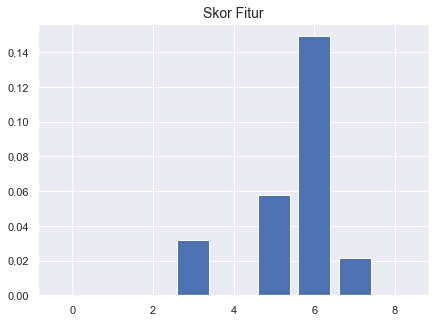

In [18]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

sns.set(rc={'figure.figsize':(7,5)})
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('Skor Fitur', fontsize=14)
plt.show()